# MEIA - TEAM 6
# Pre-Modeling: Data Preprocessing and Feature Exploration in Python
Original Dataset: https://www.oecd.org/pisa/data/2018database/



## Goal: Pre-modeling/modeling 

The dataset used was made available by the  Organisation for Economic Co-operation and Development (OECD) under the Programme for International Student Assessment (PISA). "PISA is the OECD's Program for International Student Assessment. PISA measures 15-year-olds' ability to use their reading, mathematics and science knowledge and skills to meet real-life challenges"(OECD, 2022). The dataset has an enormous complexity, consisting of 1118 columns and more than 600.000 lines, containing data from 79 countries. From this 79 countries, 41 are not OCDE members.

Before starting the treatment using Python, the dataset was analyzed bearing in mind the objectives of the present work, and, in this first phase, only the data related to Portugal was considered. Given the high number of columns that represents the features to be considered, a study was made in order to exclude those columns that are not relevant. To accomplish this, the technical specifications provided by the OECD were consulted, as well as the codebook, both available at https://www.oecd.org/pisa/. 

The criteria that was used to eliminate the columns follow the strategy:
- Columns with equal value for all students
- Columns with no values
- Columns whose data is not relevant to our problem

A closer analysis of the dataset showed that it was composed of two parts. The first part includes all the responses to the various questionnaires that are part of PISA and the second part includes indicators resulting from a treatment made by the OECD experts. These indicators result from a previous treatment of the raw data collected through the questionnaires. They have, at the outset, the particularity of being relative values, situated around the average of all PISA values. Consider the following example, concerning the Adaptive instruction indicator (ADAPTIVITY) that was constructed using students’ responses to a specific question. "Positive values on this scale mean that students perceived their language-of-instruction teachers to be more adaptive than did the average student across OECD countries." (OCDE, 2022). In this way, it was possible to exclude the answers to each of the questions from the extensive questionnaires and keep the indicators that represent them.

At the end of this process, the dataset has 45 columns and 5933 rows.

    

### Step 1 - Importing the dataset

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) # print all columns

df = pd.read_csv('PISA.csv',na_values=['#NAME?'],sep=';')
dfi=df.copy()
print (df.head(10))
print(len(df.index))   

   STRATUM  ISCEDO MISCED FISCED  DURECEC  REPEAT     ESCS UNDREM METASUM  \
0  PRT0007       1     99     99       99       9                           
1  PRT0007       1     99     99       99       9                           
2  PRT0007       1      6      6        2       1   -,0355  -1,64   -1,72   
3  PRT0007       1      2      2       99       1  -1,4516  -1,64   -1,72   
4  PRT0007       1      0      0        7       1  -2,7528    -,6   -1,72   
5  PRT0007       1     99      1        3       1  -2,9658     ,1   -1,72   
6  PRT0007       1     99     99       99       9                           
7  PRT0007       1      2      5       99       1  -2,2048   -,25   -1,72   
8  PRT0007       1      5      5       99       1  -2,0728   -,94    -,57   
9  PRT0007       1      2      1       99       1  -2,7422  -1,64   -1,72   

   HOMEPOS CULTPOSS   HEDRES   WEALTH   ICTRES  DIRINS  PERFEED  EMOSUPS  \
0       99       99       99       99       99      99       99       99   


### Step 2 - Data formating

#### 2.1- Empty values

In the dataset there are some empty values (" ").
First must be removed the leading and trailing characters using "strip".
After these values sould be replaced with a special value - 99.
These value is used by PISA as a missing value.

In [2]:

df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df.replace("","99", inplace=True)
print (df.head(10))

   STRATUM  ISCEDO MISCED FISCED  DURECEC  REPEAT     ESCS UNDREM METASUM  \
0  PRT0007       1     99     99       99       9       99     99      99   
1  PRT0007       1     99     99       99       9       99     99      99   
2  PRT0007       1      6      6        2       1   -,0355  -1,64   -1,72   
3  PRT0007       1      2      2       99       1  -1,4516  -1,64   -1,72   
4  PRT0007       1      0      0        7       1  -2,7528    -,6   -1,72   
5  PRT0007       1     99      1        3       1  -2,9658     ,1   -1,72   
6  PRT0007       1     99     99       99       9       99     99      99   
7  PRT0007       1      2      5       99       1  -2,2048   -,25   -1,72   
8  PRT0007       1      5      5       99       1  -2,0728   -,94    -,57   
9  PRT0007       1      2      1       99       1  -2,7422  -1,64   -1,72   

   HOMEPOS CULTPOSS   HEDRES   WEALTH   ICTRES  DIRINS  PERFEED  EMOSUPS  \
0       99       99       99       99       99      99       99       99   


#### 2.2- Checking data types

In [3]:
print (df.dtypes)

STRATUM         object
ISCEDO           int64
MISCED          object
FISCED          object
DURECEC          int64
REPEAT           int64
ESCS            object
UNDREM          object
METASUM         object
HOMEPOS         object
CULTPOSS        object
HEDRES          object
WEALTH          object
ICTRES          object
DIRINS          object
PERFEED         object
EMOSUPS         object
TEACHINT        object
JOYREAD         object
ATTLNACT        object
COMPETE         object
WORKMAST        object
GFOFAIL         object
EUDMO           object
SWBP            object
RESILIENCE      object
GCSELFEFF       object
DISCRIM         object
BELONG          object
BEINGBULLIED    object
CURSUPP         object
EMOSUPP         object
JOYREADP        object
PV1MATH         object
PV1SCIE         object
dtype: object


#### 2.2- Convert to numeric values
The object type should be converted to numbers.
A special attention should be given to the column "STRATUM", since is the only one that have a non numerical values. In this case, "PTR" can be removed without any loss.

In [4]:
df['STRATUM'].replace(r'[a-zA-Z%]', '', regex=True, inplace=True)

for i in range(0,35):
    if (df[df.columns[i]].dtypes=='object'):
        df[df.columns[i]] = df[df.columns[i]].str.replace('-,','-0,',n=3)
        df[df.columns[i]] = df[df.columns[i]].str.replace(',','.',n=1)
        df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])

print (df.head(10))

   STRATUM  ISCEDO  MISCED  FISCED  DURECEC  REPEAT     ESCS  UNDREM  METASUM  \
0        7       1      99      99       99       9  99.0000   99.00    99.00   
1        7       1      99      99       99       9  99.0000   99.00    99.00   
2        7       1       6       6        2       1  -0.0355   -1.64    -1.72   
3        7       1       2       2       99       1  -1.4516   -1.64    -1.72   
4        7       1       0       0        7       1  -2.7528   -0.60    -1.72   
5        7       1      99       1        3       1  -2.9658    0.10    -1.72   
6        7       1      99      99       99       9  99.0000   99.00    99.00   
7        7       1       2       5       99       1  -2.2048   -0.25    -1.72   
8        7       1       5       5       99       1  -2.0728   -0.94    -0.57   
9        7       1       2       1       99       1  -2.7422   -1.64    -1.72   

   HOMEPOS  CULTPOSS   HEDRES   WEALTH   ICTRES   DIRINS  PERFEED  EMOSUPS  \
0  99.0000   99.0000  99.0000 

In [5]:
print (df.dtypes)

STRATUM           int64
ISCEDO            int64
MISCED            int64
FISCED            int64
DURECEC           int64
REPEAT            int64
ESCS            float64
UNDREM          float64
METASUM         float64
HOMEPOS         float64
CULTPOSS        float64
HEDRES          float64
WEALTH          float64
ICTRES          float64
DIRINS          float64
PERFEED         float64
EMOSUPS         float64
TEACHINT        float64
JOYREAD         float64
ATTLNACT        float64
COMPETE         float64
WORKMAST        float64
GFOFAIL         float64
EUDMO           float64
SWBP            float64
RESILIENCE      float64
GCSELFEFF       float64
DISCRIM         float64
BELONG          float64
BEINGBULLIED    float64
CURSUPP         float64
EMOSUPP         float64
JOYREADP        float64
PV1MATH         float64
PV1SCIE         float64
dtype: object


#### 2.3-Handling missing data

##### 2.2 - Empty  values in indicators
Depending on the column values, the coding for the missing values varies between 9 and 99. This information is available in the CodeBook provided by PISA.




In [6]:
# Strategy 1 - remove ALL rows with null/invalid values
# Remove all rows with "99" (No Response) values in columns with values that are not continuous (REPEAT, MISCED, FISCED, DURECECEC)    
ind = df[ (df['MISCED'] == 99)].index
df.drop(ind, inplace=True)  

ind = df[ (df['FISCED'] == 99)].index
df.drop(ind, inplace=True) 

ind = df[ (df['DURECEC'] == 99)].index
df.drop(ind, inplace=True) 
    
ind = df[ (df['REPEAT'] == 9)].index
df.drop(ind, inplace=True)  

#Strategy 2 - Place average values for columns with continuous values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=99.0000, strategy='mean')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

print(len(df.index))       

4556


In [7]:
print (df.head(10))


   STRATUM  ISCEDO  MISCED  FISCED  DURECEC  REPEAT    ESCS  UNDREM  METASUM  \
0      7.0     1.0     6.0     6.0      2.0     1.0 -0.0355   -1.64    -1.72   
1      7.0     1.0     0.0     0.0      7.0     1.0 -2.7528   -0.60    -1.72   
2     17.0     1.0     6.0     6.0      5.0     0.0  0.6327    1.50     1.36   
3     17.0     1.0     1.0     2.0      3.0     0.0 -1.1674    0.80    -0.57   
4     17.0     1.0     2.0     2.0      3.0     1.0 -2.4247    0.10     0.59   
5     17.0     1.0     1.0     1.0      4.0     1.0 -1.3194   -0.25    -1.72   
6     17.0     1.0     2.0     2.0      5.0     0.0 -1.4685    1.15     1.36   
7     17.0     1.0     1.0     5.0      5.0     1.0 -0.2858   -0.25    -1.72   
8     17.0     2.0     5.0     5.0      3.0     1.0 -0.7363   -0.60     0.21   
9     17.0     1.0     2.0     2.0      1.0     0.0 -1.2085    1.50     0.59   

   HOMEPOS  CULTPOSS  HEDRES  WEALTH  ICTRES  DIRINS  PERFEED  EMOSUPS  \
0   0.6834    0.4440  1.1793  0.6840  0.0690 

#### 2.4- Creating proficiency levels 

Based on plausible values for math and science scores, proficiency levels (1 to 8) were created for each student. The levels used are those defined by PISA. The two columns created will correspond to the outcome.

In [8]:
# create a list of our conditions
conditionsMath = [
    (df['PV1MATH'] <= 295.47),
    (df['PV1MATH'] > 295.47) & (df['PV1MATH'] <= 357.77),
    (df['PV1MATH'] > 357.77) & (df['PV1MATH'] <= 420.07),
    (df['PV1MATH'] > 420.07) & (df['PV1MATH'] <= 482.38),
    (df['PV1MATH'] > 482.38) & (df['PV1MATH'] <= 544.68),
    (df['PV1MATH'] > 544.68) & (df['PV1MATH'] <= 606.99),
    (df['PV1MATH'] > 606.99) & (df['PV1MATH'] <= 669.30),
    (df['PV1MATH'] > 669.30) 
    ]
conditionsScie = [
    (df['PV1SCIE'] <= 295.47),
    (df['PV1SCIE'] > 295.47) & (df['PV1SCIE'] <= 357.77),
    (df['PV1SCIE'] > 357.77) & (df['PV1SCIE'] <= 420.07),
    (df['PV1SCIE'] > 420.07) & (df['PV1SCIE'] <= 482.38),
    (df['PV1SCIE'] > 482.38) & (df['PV1SCIE'] <= 544.68),
    (df['PV1SCIE'] > 544.68) & (df['PV1SCIE'] <= 606.99),
    (df['PV1SCIE'] > 606.99) & (df['PV1SCIE'] <= 669.30),
    (df['PV1SCIE'] > 669.30) 
    ]
# create a list of the values we want to assign for each condition
values = [1,2,3,4,5,6,7,8]

# create a new column and use np.select to assign values to it using our lists as arguments
df['PPM'] = np.select(conditionsMath, values)
df['PPS'] = np.select(conditionsScie, values)

# display updated DataFrame
df.head(10)

,STRATUM,ISCEDO,MISCED,FISCED,DURECEC,REPEAT,ESCS,UNDREM,METASUM,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DIRINS,PERFEED,EMOSUPS,TEACHINT,JOYREAD,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,RESILIENCE,GCSELFEFF,DISCRIM,BELONG,BEINGBULLIED,CURSUPP,EMOSUPP,JOYREADP,PV1MATH,PV1SCIE,PPM,PPS
0,7.0,1.0,6.0,6.0,2.0,1.0,-0.0355,-1.64,-1.72,0.6834,0.4440,1.1793,0.6840,0.0690,0.0345,0.9044,-2.4468,0.6797,-0.6499,0.4430,0.1956,0.5693,0.0520,1.7411,0.4094,-0.4909,-0.8622,-0.6615,-0.6824,0.290700,-0.7709,0.0721,-0.2938,316.431,221.419,2,1
1,7.0,1.0,0.0,0.0,7.0,1.0,-2.7528,-0.60,-1.72,-1.2467,0.4440,-1.6291,-1.3977,-1.4436,1.8202,2.0165,-1.3914,-0.2934,0.1499,1.0844,1.2643,-1.7067,0.4637,-0.1652,-0.5928,-1.3330,-1.0682,-0.1731,-1.0499,2.060400,-1.1583,-2.0468,0.7098,393.029,444.913,3,4
2,17.0,1.0,6.0,6.0,5.0,0.0,0.6327,1.50,1.36,0.3819,0.5695,-0.1357,-0.0799,-0.1400,-0.1809,-0.0008,1.0346,-1.4401,1.0387,0.0321,1.1811,1.8164,1.0671,-0.7233,-0.3236,0.6397,2.3535,0.9385,0.3241,1.162500,0.2615,0.7390,-0.2938,543.419,598.710,5,6
3,17.0,1.0,1.0,2.0,3.0,0.0,-1.1674,0.80,-0.57,0.2284,0.7789,0.0477,-0.1500,-0.1536,0.5845,0.2682,-0.6576,-0.2934,0.7178,1.0844,-0.5707,-0.1015,0.4637,-0.1652,0.1869,-0.5176,-0.5257,-0.5252,-0.3184,-0.782300,1.1173,-0.5553,0.3075,523.814,497.082,5,5
4,17.0,1.0,2.0,2.0,3.0,1.0,-2.4247,0.10,0.59,-2.5193,-1.0840,-1.3835,-2.3598,-2.8050,-1.0988,-0.9900,-1.2947,0.9888,0.8628,0.4430,-2.3450,-0.7233,-0.6870,-0.9827,-0.5928,-0.4684,-0.4720,0.8403,-0.4509,-0.252395,-0.7915,-1.7606,-1.2085,440.710,463.280,4,4
5,17.0,1.0,1.0,1.0,4.0,1.0,-1.3194,-0.25,-1.72,-0.3642,0.0469,0.0477,-0.3677,-0.8694,0.0054,0.7743,-0.6576,-0.2934,-0.7983,-0.6583,0.1956,-0.1015,0.3335,-0.3121,-0.5928,-0.0614,0.1904,0.5881,-0.3184,-0.782300,-0.3439,-2.2196,-2.2515,475.060,428.439,4,4
6,17.0,1.0,2.0,2.0,5.0,0.0,-1.4685,1.15,1.36,-0.3854,-0.2303,-0.6853,-0.0995,-0.5742,0.3183,0.7743,1.0346,-1.0615,0.0127,1.0844,-0.5707,-0.1015,-0.4342,-0.9827,0.1869,-0.5176,-0.1974,0.5881,0.3241,-0.782300,-0.1391,0.7390,-0.2574,572.542,489.759,6,5
7,17.0,1.0,1.0,5.0,5.0,1.0,-0.2858,-0.25,-1.72,0.5406,0.3164,1.1793,0.4626,0.3330,1.8202,-1.2560,1.0346,0.5901,0.5286,-0.0159,-2.3450,-0.3986,1.8905,0.1333,0.6502,0.1218,-2.7142,-0.1720,-0.5919,1.534600,4.7142,0.0721,2.2623,353.637,398.559,2,3
8,17.0,2.0,5.0,5.0,3.0,1.0,-0.7363,-0.60,0.21,-0.8382,-1.7773,1.1793,-0.4057,-0.8436,0.2860,0.9044,1.0346,0.3684,0.9112,0.0083,1.1811,0.9982,-1.2792,0.9269,1.2386,0.3858,-0.2762,-1.1549,0.5082,-0.782300,0.0186,0.7390,-0.3957,406.041,392.636,3,3
9,17.0,1.0,2.0,2.0,1.0,0.0,-1.2085,1.50,0.59,0.0159,0.2410,-0.1357,-0.0995,-0.5742,0.6525,-0.3253,1.0346,-1.0615,0.2999,1.0844,-0.7330,0.9982,-1.8939,-0.5690,-0.5928,-0.0614,-0.2200,-1.1549,0.3018,0.290700,1.3171,-0.5553,-0.9295,503.149,431.782,5,4


#### 2.5- Normalizing values

The "STRATUM" column contains coding by values, making it necessary to create dummy columns for further processing.

In [9]:
# Use dummies for regions 

dummies = pd.get_dummies(df['STRATUM'], prefix='STRATUM', dummy_na=False)
df = df.drop('STRATUM',1) 
df = pd.concat([df,dummies], axis=1)


/var/folders/vz/_cdypgvj6nd999rqphtsck4r0000gn/T/ipykernel_23749/3449872216.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('STRATUM',1)


In [10]:
print (df.head(5))


   ISCEDO  MISCED  FISCED  DURECEC  REPEAT    ESCS  UNDREM  METASUM  HOMEPOS  \
0     1.0     6.0     6.0      2.0     1.0 -0.0355   -1.64    -1.72   0.6834   
1     1.0     0.0     0.0      7.0     1.0 -2.7528   -0.60    -1.72  -1.2467   
2     1.0     6.0     6.0      5.0     0.0  0.6327    1.50     1.36   0.3819   
3     1.0     1.0     2.0      3.0     0.0 -1.1674    0.80    -0.57   0.2284   
4     1.0     2.0     2.0      3.0     1.0 -2.4247    0.10     0.59  -2.5193   

   CULTPOSS  HEDRES  WEALTH  ICTRES  DIRINS  PERFEED  EMOSUPS  TEACHINT  \
0    0.4440  1.1793  0.6840  0.0690  0.0345   0.9044  -2.4468    0.6797   
1    0.4440 -1.6291 -1.3977 -1.4436  1.8202   2.0165  -1.3914   -0.2934   
2    0.5695 -0.1357 -0.0799 -0.1400 -0.1809  -0.0008   1.0346   -1.4401   
3    0.7789  0.0477 -0.1500 -0.1536  0.5845   0.2682  -0.6576   -0.2934   
4   -1.0840 -1.3835 -2.3598 -2.8050 -1.0988  -0.9900  -1.2947    0.9888   

   JOYREAD  ATTLNACT  COMPETE  WORKMAST  GFOFAIL   EUDMO    SWBP  RE

### Step 3 - Data exploration

#### 3.1- Outlier detection

It´s important to find values that could desviates severelly from others. It will be used 2 methods: 

##### 3.1.1 - Tukey IQR

Values: [238.237, 216.93, 232.043, 153.454, 778.664, 204.982, 235.681, 231.248, 183.931, 233.282, 220.858]
Indices: [481, 1534, 1616, 1873, 2782, 2992, 3032, 3523, 3554, 3945, 4356]
[153.454 183.931 204.982 216.93  220.858 231.248 232.043 233.282 235.681
 238.237 778.664]


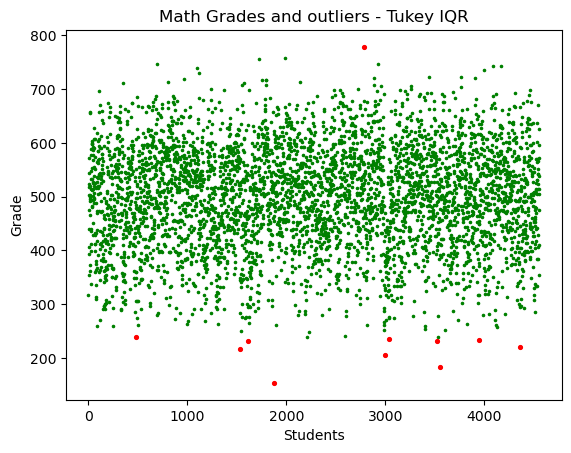

In [11]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values


tukey_indices, tukey_values = find_outliers_tukey(df['PV1MATH'])
print ("Values:",tukey_values)
print ("Indices:",tukey_indices)
print(np.sort(tukey_values))


%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df.index, df['PV1MATH'],  label="kjhuhhjhjkj", color= "green", marker= ".",s=10)
plt.title("Math Grades and outliers - Tukey IQR")
plt.xlabel("Students")
plt.ylabel("Grade")
plt.scatter(tukey_indices, tukey_values, label="rrr", color= "red", marker= ".",s=30)
  
plt.show() 



##### 3.1.2 - Kernel Density Estimatation

[153.454 183.931 204.982 216.93  220.858 231.248 232.043 233.282 235.681
 238.237 238.619 238.973 241.509 248.332 249.662 251.242 252.483 254.061
 257.847 259.246 259.892 259.964 260.567 261.052 261.428 261.666 261.855
 263.534 263.552 263.818 265.347 267.557 268.451 269.574 270.35  270.97
 271.052 271.109 272.73  273.575 274.116 274.478 274.655 275.266 275.48
 276.351 276.362 277.381 278.271 278.392 279.297 279.589 279.8   280.327
 280.925 281.206 281.703 281.903 283.258 283.458 283.742 284.047 284.576
 285.132 285.646 286.458 286.501 287.472 287.535 287.932 288.212 288.795
 289.672 290.092 290.114 690.063 690.201 690.262 690.493 690.868 691.539
 692.16  692.2   692.335 692.491 694.538 696.317 696.949 697.313 697.785
 698.819 698.923 698.96  699.055 699.135 699.835 700.291 701.279 703.616
 706.072 706.796 707.922 707.978 708.254 711.478 712.314 712.981 713.057
 717.046 717.55  717.599 718.771 720.724 721.669 722.461 723.109 730.559
 736.117 738.678 742.704 744.036 746.09  747.593 756.

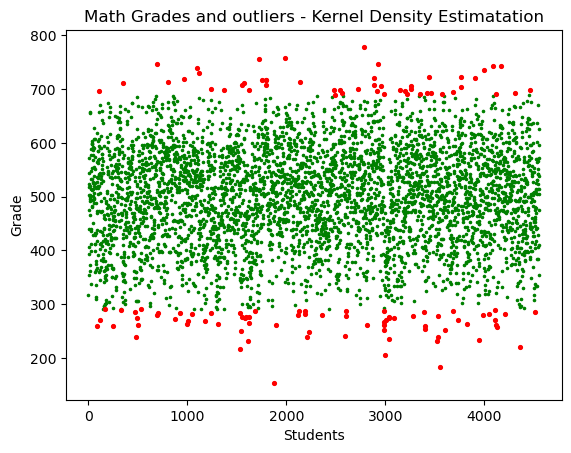

In [12]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value
kde_indices, kde_values = find_outliers_kde(df['PV1MATH'])
print(np.sort(kde_values))


%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df.index, df['PV1MATH'],  label="rrr", color= "green", marker= ".",s=10)
plt.title("Math Grades and outliers - Kernel Density Estimatation")
plt.xlabel("Students")
plt.ylabel("Grade")
plt.scatter(kde_indices, kde_values, label="rrr", color= "red", marker= ".",s=30)
  
plt.show() 


Both methods do not show values with a considerable degree of deviation. Thus, it was decided not to remove it from the dataset.

#### 3.2- Distribution of features

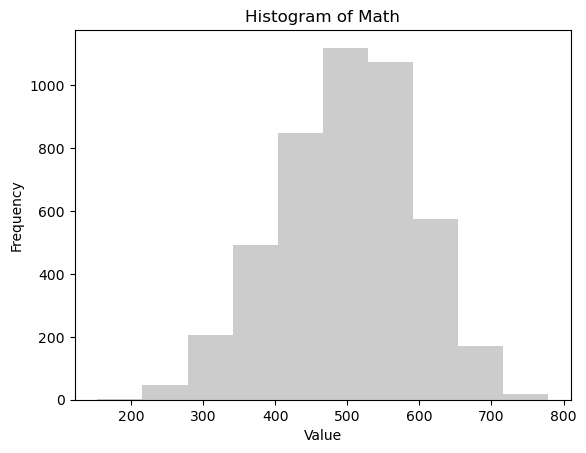

In [13]:
def plot_histogram(x):
    plt.hist(x, color='gray', alpha=0.4)
    plt.title("Histogram of Math")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
plot_histogram(df['PV1MATH'])

## Step 4: Feature Engineering

#### 4.1- Interations among features:

In [14]:
df=df.drop('PV1MATH',1)
df=df.drop('PV1SCIE',1)

# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

df = add_interactions(df)


/var/folders/vz/_cdypgvj6nd999rqphtsck4r0000gn/T/ipykernel_23749/3997777338.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('PV1MATH',1)
/var/folders/vz/_cdypgvj6nd999rqphtsck4r0000gn/T/ipykernel_23749/3997777338.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('PV1SCIE',1)


#### 4.2 - Dimensionality reduction using PCA

Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
df_pca = pd.DataFrame(pca.fit_transform(df))

print(df_pca.head(5))

          0          1          2          3          4          5         6   \
0 -18.561377 -32.298633  22.379834   0.224688  -5.783569   4.551983 -6.447481   
1 -48.589315   9.038671   4.520195  -1.157627  -8.648764  22.945631  0.146821   
2  50.858114   5.647623   5.425089  -4.354988   5.268357   8.462058 -2.069147   
3 -22.782312   8.315513  -4.697353  11.064078  -1.931040   4.040515 -1.837298   
4 -37.994434  21.632073  11.448121 -15.426381 -12.513209  -4.849325  1.324319   

          7          8          9          10         11         12  \
0   0.622935  -0.595822   4.227201   1.156787   2.006798   4.784106   
1   0.016979   8.343208 -11.290999   2.391557  -8.027862   9.331199   
2  36.424480  22.856972  10.077513  -2.115803 -15.988695 -16.663790   
3   3.441805  -5.762941  -8.629652  -0.594309   1.130751   3.572504   
4   8.661912  -4.742194   4.017802  14.143568  -3.862948   6.902965   

          13        14        15         16        17        18        19  \
0 -14.919

## Step 5: Feature selection and model building - WORK IN PROGRESS!!!!

### 5.1- Build model using processed data

In [64]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split
y=df.PPM
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.70, random_state=1)

In [65]:
# The total number of features have grown substantially after dummying and adding interaction terms
print(dfi.shape) # dataset inicial
print(dff.shape)


(5932, 35)
(4556, 1469)


In [66]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=10)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

/Users/fatimapais/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [60]:
print(colnames_selected)

['REPEAT', 'PPS', 'ISCEDO_REPEAT', 'MISCED_PPM', 'MISCED_PPS', 'FISCED_PPM', 'DURECEC_REPEAT', 'DURECEC_PPM', 'DURECEC_PPS', 'PPM_PPS']


In [67]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression(solver="liblinear").fit(X_train, y_train)
    y_hat=model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
    
    return auc

In [68]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.8454678055809048
